## *Data: Feature extraction, and visualization*

In [586]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [587]:
df=pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,NaN,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,1401,4,118,2022-09-11,0.87,1,42,5,NaN
1,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,NaN,Nrrebro,55.69388,12.54725,Entire home/apt,793,5,92,2023-03-22,0.69,1,5,4,NaN
2,338992,Rental unit in Copenhagen · ★4.58 · 2 bedrooms...,799887,Bente,NaN,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,1000,1,378,2022-09-26,2.75,3,0,2,NaN
3,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,NaN,Nrrebro,55.68641,12.54741,Entire home/apt,803,3,173,2023-01-02,1.03,1,0,1,NaN
4,339126,Rental unit in Copenhagen · ★4.88 · 2 bedrooms...,1589153,Michael & Bille Max,NaN,Vesterbro-Kongens Enghave,55.67284,12.54717,Entire home/apt,2400,2,77,2023-06-19,0.57,1,128,14,NaN


In [588]:
df.shape

(17027, 18)

In [589]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [590]:
df=df.drop(columns=['neighbourhood_group','license','id','host_id','host_name','calculated_host_listings_count','last_review', 'reviews_per_month', 'number_of_reviews_ltm'])    #drop non-desired columns

Here we perform data parsing for column 'name', transforming it into 'type,rating,bed,bedroom,bath' columns. Also, we make sure that datatypes for newly created columns are correct.

In [591]:
#extract the information/datatype from the 'name' column
#type_of = df['name'].str.extract(r'^(.*?)\s*[\d.]+')
#extract the rating and convert to numeric
rating_format1 = df['name'].str.extract(r'(\d+\.\d+)')  #rating format "x.x"
rating_format2 = df['name'].str.extract(r'(\d+\.\d+)\/')  #rating format "x.x/"
df['rating'] = pd.to_numeric(rating_format1.fillna(rating_format2)[0], errors='coerce')
#extract the num of bed,bedrooms, baths
df['bedroom'] = df['name'].str.extract(r'(\d+)\s+bedroom')  # Extracts the number of bedrooms
df['bed'] = df['name'].str.extract(r'(\d+)\s+bed')  # Extracts the number of beds
df['bath'] = df['name'].str.extract(r'(\d+)\s+bath')  # Extracts the number of baths
#convert the columns to the appropriate data types (int - since it's num of bed,bedrooms, baths)
df['bedroom'] = pd.to_numeric(df['bedroom'], errors='coerce')
df['bed'] = pd.to_numeric(df['bed'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')
#drop 'name' column
df.drop(columns=['name'], inplace=True)

In [592]:
#If we're missing values in one of these 9 filtered columns, we remove that row..
if df['price'].isna().any():
    print(f"Column has missing values.")
else:
    print(f"Column has no missing values.")

Column has no missing values.


In [593]:
# Our dataset looks like this now;
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bed,bath
0,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,1401,4,118,42,4.88,1.0,1.0,1.0
1,Nrrebro,55.69388,12.54725,Entire home/apt,793,5,92,5,4.91,1.0,1.0,1.0
2,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,1000,1,378,0,4.58,2.0,2.0,NaN
3,Nrrebro,55.68641,12.54741,Entire home/apt,803,3,173,0,4.78,1.0,1.0,1.0
4,Vesterbro-Kongens Enghave,55.67284,12.54717,Entire home/apt,2400,2,77,128,4.88,2.0,2.0,5.0


Pearson correlation heatmap, to investigate the connection of price with other attributes:

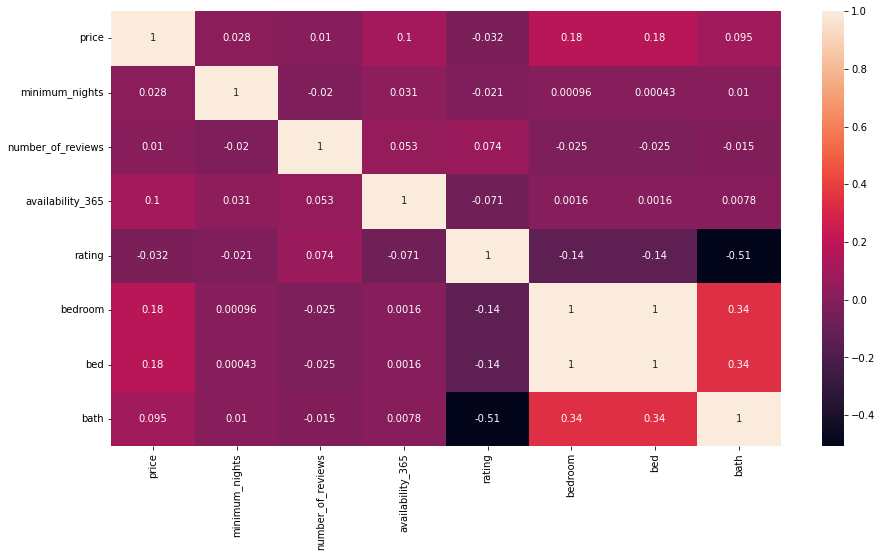

In [594]:
df_cor=df[['price','minimum_nights','number_of_reviews','availability_365','rating','bedroom','bed','bath']]
plt.figure(figsize=(15,8))
sb.heatmap(df_cor.corr(method="pearson"), annot=True, annot_kws={"size":10})
plt.show()

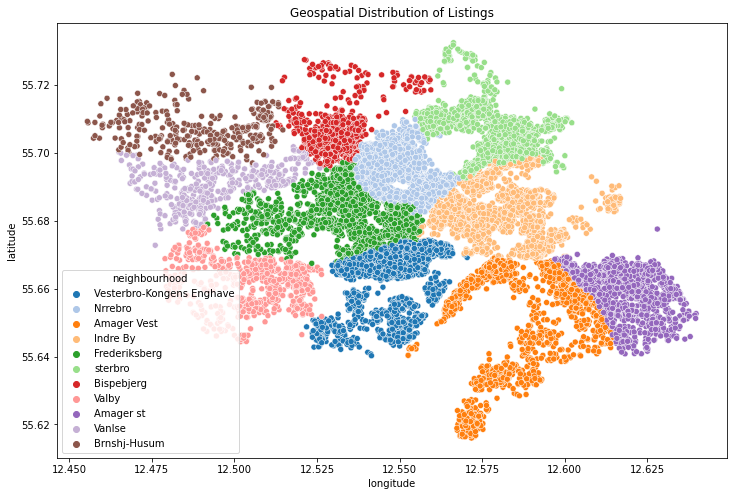

In [595]:
# Scatterplot for Geospatial Data
plt.figure(figsize=(12, 8))
sb.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood', palette='tab20')
plt.title('Geospatial Distribution of Listings')
plt.show()

In [596]:
# use the describe function to get the summary statistics of the data and detect outliers
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bed,bath
count,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,12004.000000,16799.000000,17023.000000,15405.000000
mean,55.680244,12.558654,1261.054149,4.506196,17.445175,85.985083,4.695928,1.640038,1.637902,1.370140
std,0.019229,0.031353,1868.683966,15.433537,39.016123,115.196636,0.646543,0.910912,0.911358,1.078443
min,55.615990,12.455520,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,55.666210,12.540870,799.000000,2.000000,1.000000,0.000000,4.700000,1.000000,1.000000,1.000000
50%,55.681488,12.555340,1000.000000,3.000000,6.000000,18.000000,4.860000,1.000000,1.000000,1.000000
75%,55.695440,12.580615,1401.000000,4.000000,18.000000,160.000000,5.000000,2.000000,2.000000,1.000000
max,55.732470,12.639720,150364.000000,1111.000000,1178.000000,365.000000,5.000000,15.000000,15.000000,5.000000


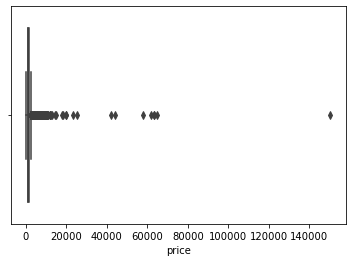

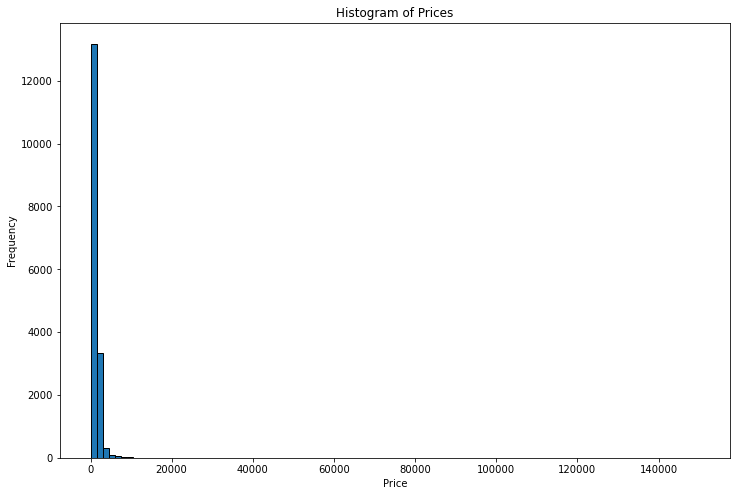

In [597]:
# Plot the distribution of the price
sb.boxplot(x=df['price'])

# Specify the number of bins and the range for the price intervals
num_bins = 100  # You can adjust this value to change the number of intervals
price_range = (0, 150000)  # You can adjust this value to change the range of the intervals

# Create the histogram with horizontal orientation
plt.figure(figsize=(12, 8))
plt.hist(df['price'], bins=num_bins, orientation='vertical', range=price_range, edgecolor='k')

# Label the axes and add a title
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Histogram of Prices')

# Show the plot
plt.show()

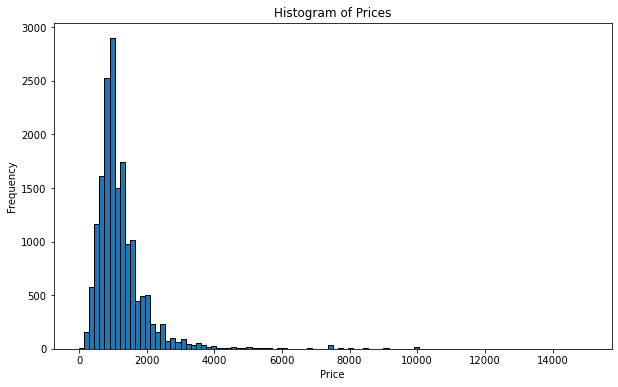

In [598]:
# Plot the distribution of the price

num_bins = 100  
price_range = (0,15000)  # Define the price range (adjust as needed)

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=num_bins, orientation='vertical', range=price_range, edgecolor='k')

# Label the axes and add a title
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Histogram of Prices')

# Show the plot
plt.show()

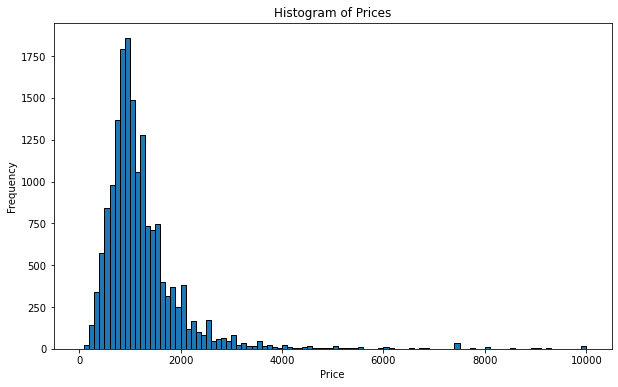

In [599]:
# Plot the distribution of the price
numerical_attributes = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

# Specify the number of bins and the range for the price intervals
num_bins = 100  # You can adjust this value to change the number of intervals
price_range = (0,10000)  # Define the price range (adjust as needed)

# Create the histogram with horizontal orientation
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=num_bins, orientation='vertical', range=price_range, edgecolor='k')

# Label the axes and add a title
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Histogram of Prices')

# Show the plot
plt.show()

Now we see that there are still some values way higher than the normal, but it's not as dramatic as before

In [600]:
df["price"].describe()

count     17027.000000
mean       1261.054149
std        1868.683966
min           0.000000
25%         799.000000
50%        1000.000000
75%        1401.000000
max      150364.000000
Name: price, dtype: float64

In [601]:
count_100 = 0
count_80 = 0
count_50 = 0
count_30 = 0
count_15 = 0
count_10 = 0
for i in df["price"]:
    if i > 100000:
        count_100 += 1
        count_80 += 1
        count_50 += 1
        count_30 += 1
        count_15 += 1
        count_10 += 1

    elif i > 80000:
        count_80 += 1
        count_50 += 1
        count_30 += 1
        count_15 += 1
        count_10 += 1

    elif i > 50000:
        count_50 += 1
        count_30 += 1
        count_15 += 1
        count_10 += 1

    elif i > 30000:
        count_30 += 1
        count_15 += 1
        count_10 += 1

    elif i > 15000:
        count_15 += 1
        count_10 += 1
    elif i > 10000:
        count_10 += 1

# print all the values in one line, including legend
print(f"Entries over 100k: {count_100}, 80k: {count_80}, 50k: {count_50}, 30k: {count_30}, 15k: {count_15}, 10k: {count_10} out of 17027 entries.")

Entries over 100k: 1, 80k: 1, 50k: 6, 30k: 8, 15k: 14, 10k: 25 out of 17027 entries.


Might make sense to apply a low pass filter at 15k per night?

<Figure size 864x576 with 0 Axes>

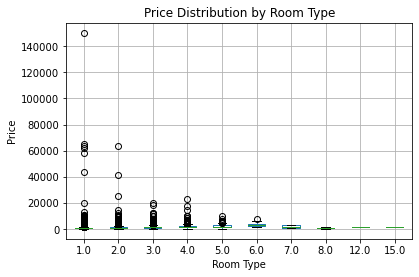

In [602]:
# Create a box plot for 'price' grouped by 'room_type' without using seabon
plt.figure(figsize=(12, 8))
df.boxplot(column='price', by='bed')
plt.title('Price Distribution by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.suptitle('')  # This removes the automatic title that pandas adds
plt.show()

In [603]:
# delete rows where price is greater than 10000
df = df[df['price'] < 10000]

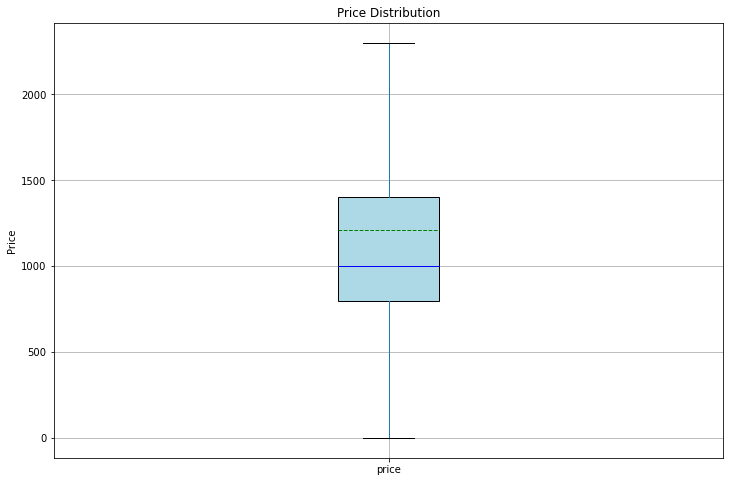

In [604]:
# create a box plot for 'price'
plt.figure(figsize=(12, 8))
df.boxplot(column='price', showfliers=False, showmeans=True, patch_artist=True, boxprops = dict(facecolor = "lightblue"),meanline = True, meanprops = dict(color = "green", linewidth=1), medianprops = dict(color = "blue", linewidth = 1))
plt.title('Price Distribution')
plt.ylabel('Price')
plt.suptitle('')  # This removes the automatic title that pandas adds
plt.show()

<Figure size 864x576 with 0 Axes>

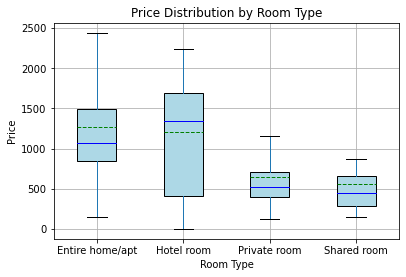

In [620]:
# Create a box plot for 'price' grouped by 'room_type' without using seabon
plt.figure(figsize=(12, 8))
df.boxplot(column='price', by='room_type', showfliers=False, showmeans=True, patch_artist=True, boxprops = dict(facecolor = "lightblue"),meanline = True, meanprops = dict(color = "green", linewidth=1), medianprops = dict(color = "blue", linewidth = 1))
plt.title('Price Distribution by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.suptitle('')  # This removes the automatic title that pandas adds
plt.show()

In [606]:
df['room_type'].head()

0    Entire home/apt
1    Entire home/apt
2       Private room
3    Entire home/apt
4    Entire home/apt
Name: room_type, dtype: object

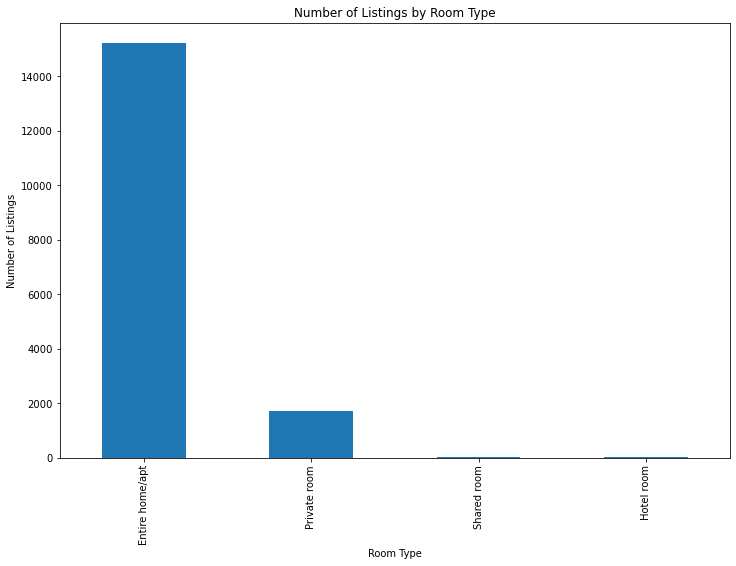

In [621]:
# Create a bar chart to show the count of listings in each 'neighbourhood' to identify the most popular neighborhoods.
plt.figure(figsize=(12, 8))
df['room_type'].value_counts().plot(kind='bar')
plt.title('Number of Listings by Room Type')
plt.ylabel('Number of Listings')
plt.xlabel('Room Type')
plt.show()

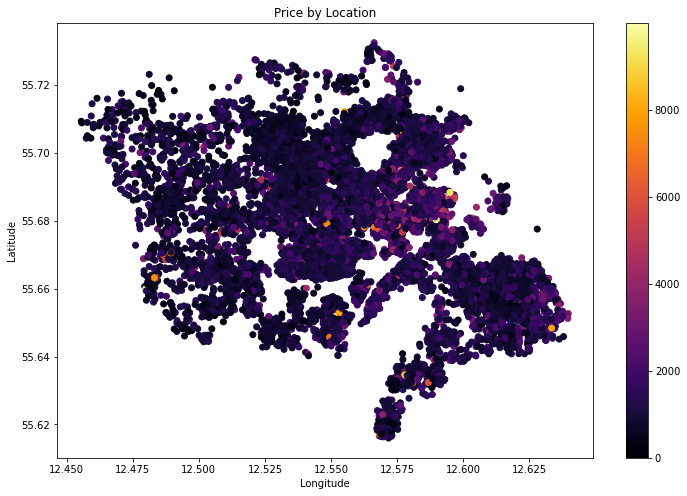

In [608]:
# create a heatmap with longitude and latitude as x and y axis and price as the color
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap="inferno")
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price by Location')
plt.show()

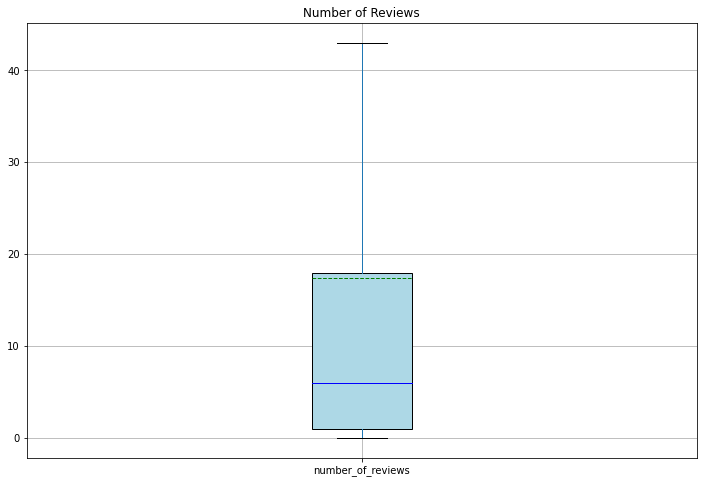

In [609]:
# plot the boxplot for number of reviews
plt.figure(figsize=(12, 8))
df.boxplot(column='number_of_reviews', showfliers=False, showmeans=True, patch_artist=True, boxprops = dict(facecolor = "lightblue"),meanline = True, meanprops = dict(color = "green", linewidth=1), medianprops = dict(color = "blue", linewidth = 1))
plt.title('Number of Reviews')
plt.ylabel('')
plt.xlabel('')
plt.suptitle('')  # This removes the automatic title that pandas adds
plt.show()

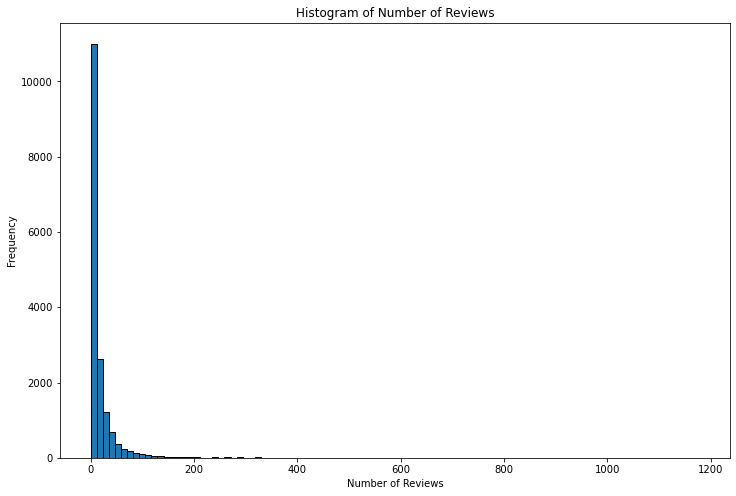

In [625]:
# create number of reviews histogram
plt.figure(figsize=(12, 8))
plt.hist(df['number_of_reviews'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Number of Reviews')
plt.title('Histogram of Number of Reviews')
plt.show()

<Axes: xlabel='minimum_nights'>

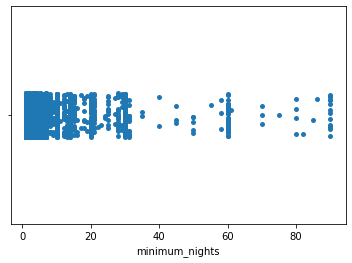

In [627]:
# plot the distribution histogram of the minimum nights
sb.stripplot(x='minimum_nights', data=df)

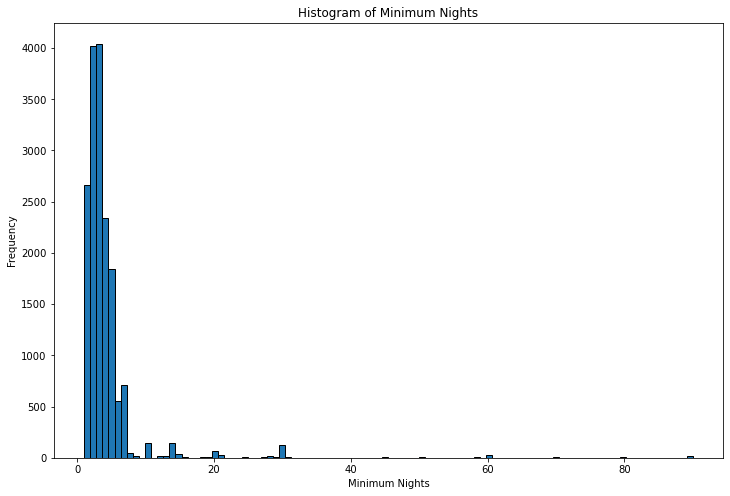

In [628]:
# minimum nights histogram
plt.figure(figsize=(12, 8))
plt.hist(df['minimum_nights'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Minimum Nights')
plt.title('Histogram of Minimum Nights')
plt.show()

<Axes: xlabel='minimum_nights', ylabel='price'>

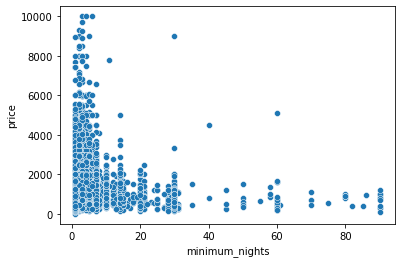

In [611]:
# limit minimum nights to 30
df = df[df['minimum_nights'] <= 90]
sb.scatterplot(x='minimum_nights', y='price', data=df)


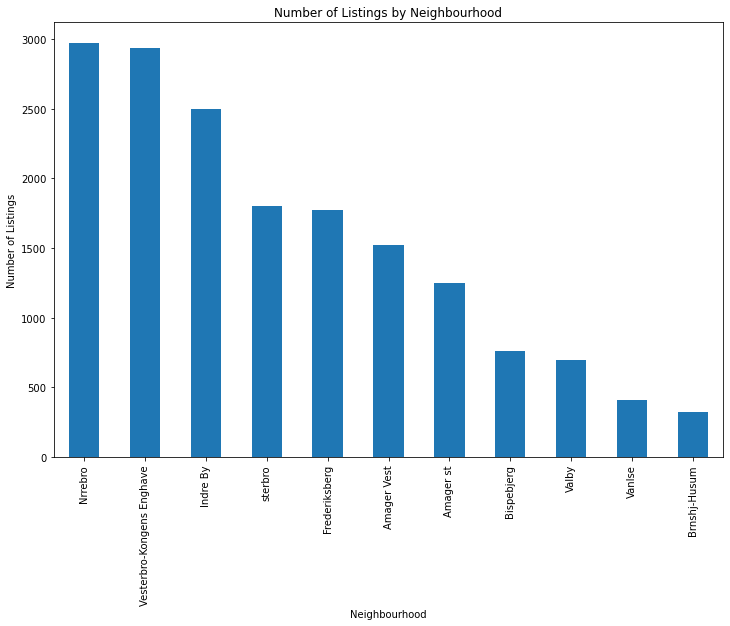

In [612]:
# Create a bar chart to show the count of listings in each 'neighbourhood' to identify the most popular neighborhoods.
plt.figure(figsize=(12, 8))
df['neighbourhood'].value_counts().plot(kind='bar')
plt.title('Number of Listings by Neighbourhood')
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood')
plt.show()


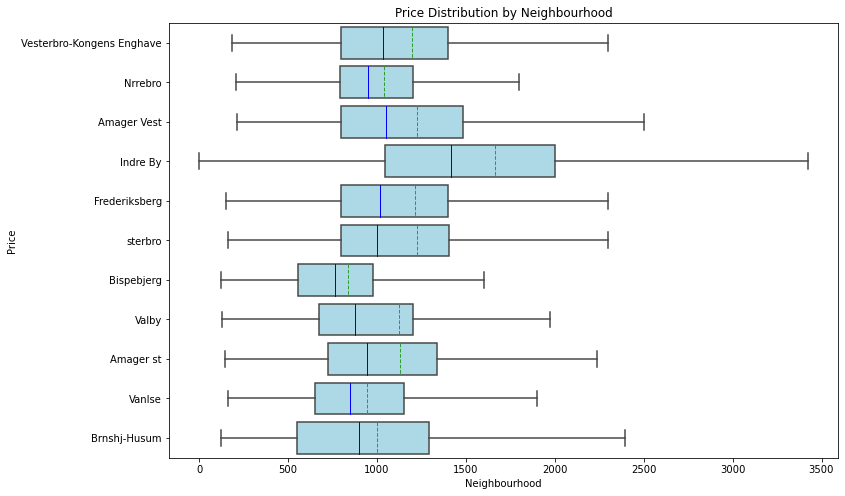

In [613]:
# Create a box plot for 'price' grouped by 'room_type' without using seabon
fig, ax = plt.subplots(figsize=(12, 8))
sb.boxplot(y='neighbourhood', x='price', orient='h', data=df, width=0.8,showfliers=False, showmeans=True, meanline = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "blue", linewidth = 1), ax=ax)
plt.title('Price Distribution by Neighbourhood')
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.suptitle('')  # This removes the automatic title that pandas adds
plt.show()

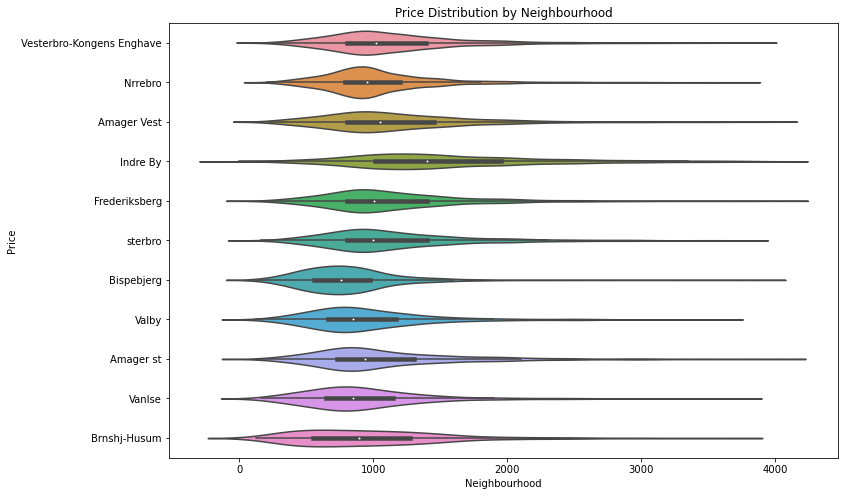

In [614]:
# create a violin plot of the price distribution by neighbourhood
df_clone = df[df['price'] < 4000]
plt.figure(figsize=(12, 8))
sb.violinplot(y='neighbourhood', x='price', data=df_clone, width=0.8,showextrema = False, showmeans=False, meanline = False, showflyers=False)
plt.title('Price Distribution by Neighbourhood')
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.show()

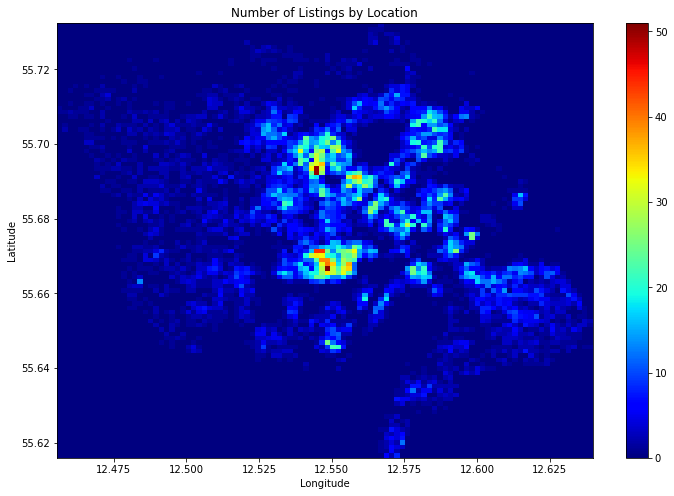

In [615]:
# create 2d heatmap of number of entries by latitude and longitude intervals
plt.figure(figsize=(12, 8))
plt.hist2d(df['longitude'], df['latitude'], bins=100, cmap='jet')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of Listings by Location')
plt.show()


In [616]:
# normalize the 'latitude' and 'longitude' columns
df['latitude'] = (df['latitude'] - df['latitude'].mean()) / df['latitude'].std()
df['longitude'] = (df['longitude'] - df['longitude'].mean()) / df['longitude'].std()
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bed,bath
0,Vesterbro-Kongens Enghave,-0.502259,-0.068128,Entire home/apt,1401,4,118,42,4.88,1.0,1.0,1.0
1,Nrrebro,0.708647,-0.363468,Entire home/apt,793,5,92,5,4.91,1.0,1.0,1.0
2,Vesterbro-Kongens Enghave,-0.343162,-0.090454,Private room,1000,1,378,0,4.58,2.0,2.0,NaN
3,Nrrebro,0.320263,-0.358364,Entire home/apt,803,3,173,0,4.78,1.0,1.0,1.0
4,Vesterbro-Kongens Enghave,-0.385275,-0.366019,Entire home/apt,2400,2,77,128,4.88,2.0,2.0,5.0


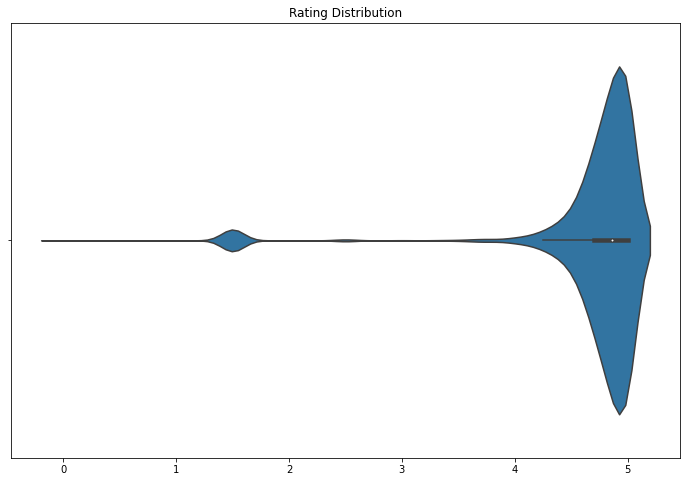

In [617]:
#stip plot of the rating
plt.figure(figsize=(12, 8))
sb.violinplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.ylabel('')
plt.xlabel('')
plt.suptitle('')  # This removes the automatic title that pandas adds
plt.show()

In [618]:
# normalize the 'rating' column
df['rating'] = (df['rating'] - df['rating'].mean()) / df['rating'].std()
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bed,bath
0,Vesterbro-Kongens Enghave,-0.502259,-0.068128,Entire home/apt,1401,4,118,42,0.284154,1.0,1.0,1.0
1,Nrrebro,0.708647,-0.363468,Entire home/apt,793,5,92,5,0.330579,1.0,1.0,1.0
2,Vesterbro-Kongens Enghave,-0.343162,-0.090454,Private room,1000,1,378,0,-0.180100,2.0,2.0,NaN
3,Nrrebro,0.320263,-0.358364,Entire home/apt,803,3,173,0,0.129402,1.0,1.0,1.0
4,Vesterbro-Kongens Enghave,-0.385275,-0.366019,Entire home/apt,2400,2,77,128,0.284154,2.0,2.0,5.0


In [619]:
# perform PCA on the 'latitude' and 'longitude' columns
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
df['location'] = pca.fit_transform(df[['latitude', 'longitude']])
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bed,bath,location
0,Vesterbro-Kongens Enghave,-0.502259,-0.068128,Entire home/apt,1401,4,118,42,0.284154,1.0,1.0,1.0,-0.306977
1,Nrrebro,0.708647,-0.363468,Entire home/apt,793,5,92,5,0.330579,1.0,1.0,1.0,0.758099
2,Vesterbro-Kongens Enghave,-0.343162,-0.090454,Private room,1000,1,378,0,-0.180100,2.0,2.0,NaN,-0.178691
3,Nrrebro,0.320263,-0.358364,Entire home/apt,803,3,173,0,0.129402,1.0,1.0,1.0,0.479862
4,Vesterbro-Kongens Enghave,-0.385275,-0.366019,Entire home/apt,2400,2,77,128,0.284154,2.0,2.0,5.0,-0.013616
